## Simple heatmap

/home/alex/miniconda3/envs/chocolata/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


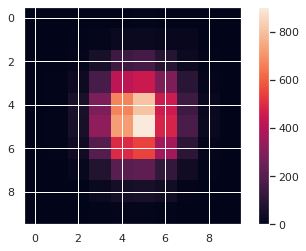

In [14]:
import numpy as np
from matplotlib import pyplot as plt

# bivariate Gaussian distribution
mean = [0,0]
cov = [[0,1],[1,0]] 
x, y = np.random.multivariate_normal(mean, cov, 10000).T

hist, xedges, yedges = np.histogram2d(x,y)
X,Y = np.meshgrid(xedges,yedges)
plt.imshow(hist)
plt.grid(True)
plt.colorbar()
plt.show()

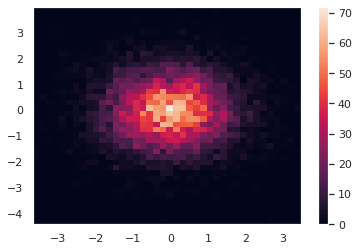

In [15]:
# changing the bin-size

plt.hist2d(x, y, bins=40)
plt.colorbar()
plt.grid()
plt.show()

## Correlation Heatmap

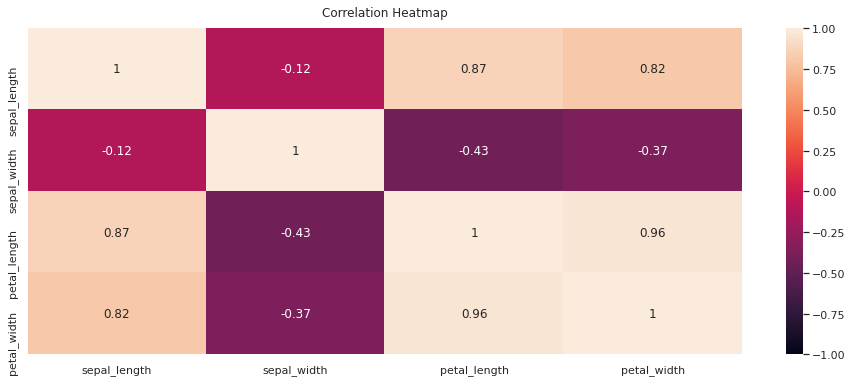

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd


iris = sns.load_dataset("iris")

plt.figure(figsize=(16,6))
heatmap = sns.heatmap(iris.corr(), annot=True, vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Triangle Correlation Heatmap

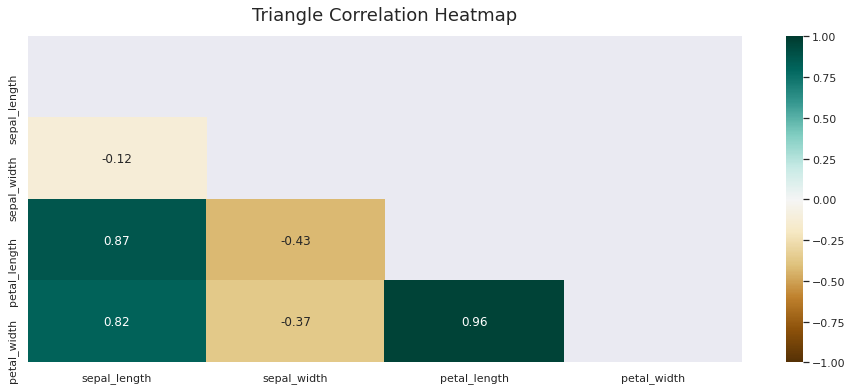

In [30]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(iris.corr(), dtype=np.bool))
heatmap = sns.heatmap(iris.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Dendogram with sns heatmap

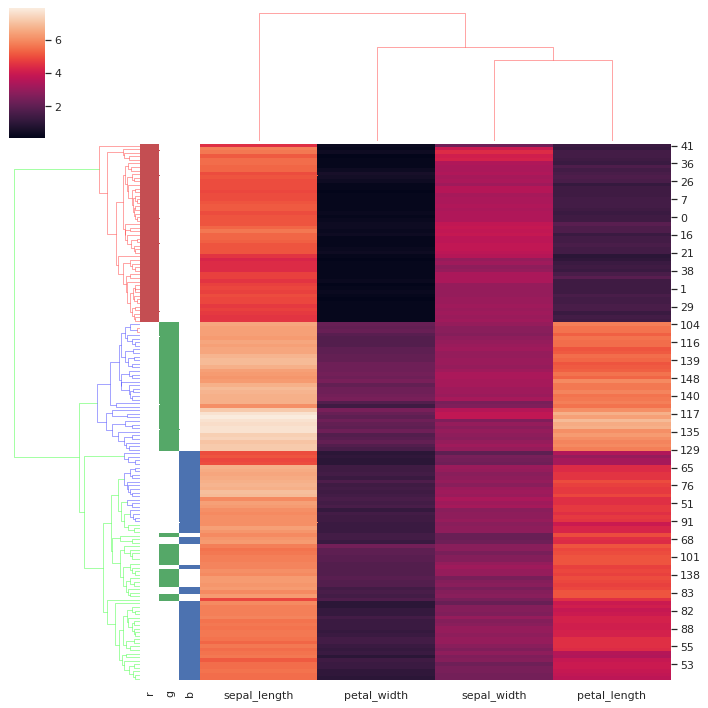

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd


iris = sns.load_dataset("iris")
species = iris.pop("species")
#g = sns.clustermap(iris)

# 
palette = dict(zip(species.unique(), "rbg"))
row_colors = species.map(palette)
df_colors = pd.DataFrame(data={'r': row_colors[row_colors == 'r'], 
                               'g': row_colors[row_colors == 'g'], 
                               'b': row_colors[row_colors == 'b']}) 


colmap = {'setosa': (1, 0, 0, 0.7), 
          'virginica': (0, 1, 0, 0.7), 
          'versicolor': (0, 0, 1, 0.7)}
g = sns.clustermap(iris, row_colors=df_colors, tree_kws={'colors':[colmap[s] for s in species]})